In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train_data = pd.read_parquet("/content/drive/MyDrive/TP2 - ORGANIZACIÓN DE DATOS/dataset_v2/train.parq", engine="pyarrow")


Mounted at /content/drive


## Plot marginal 2d mostrando la distribución de Ataques por Hora y Día de la Semana del label 1

<Figure size 2400x1600 with 0 Axes>

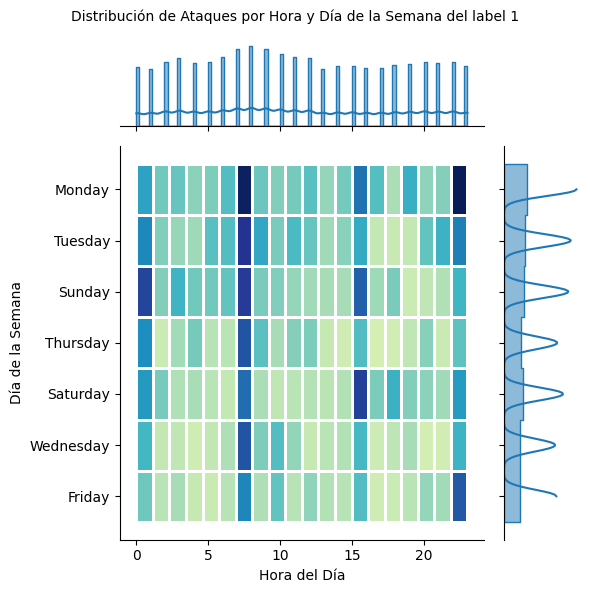

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos donde label es igual a 1
df_label_1 = train_data[train_data['label'] == 1].copy()

df_label_1['day_of_week'] = df_label_1['attack_time'].dt.day_name()
df_label_1['hour_of_day'] = df_label_1['attack_time'].dt.hour

plt.figure(figsize=(24, 16))
g = sns.JointGrid(data=df_label_1, x='hour_of_day', y='day_of_week', space=0, ratio=4)
g = g.plot_joint(sns.histplot, cmap='YlGnBu', edgecolor='white', bins=20)
plt.xticks(range(24))
g = g.plot_marginals(sns.histplot, kde=True, element='step', common_norm=False)
plt.suptitle('Distribución de Ataques por Hora y Día de la Semana del label 1', fontsize=10)
g.set_axis_labels('Hora del Día', 'Día de la Semana')

plt.tight_layout()

plt.show()
